# Capstone Project Group 4

## Introduction
### Background information

According to the CDC, heart disease is one of the leading causes of death for people of most races in the US (African Americans, American Indians and Alaska Natives, and white people). About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. Other key indicator include diabetic status, obesity (high BMI), not getting enough physical activity or drinking too much alcohol. Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Computational developments, in turn, allow the application of machine learning methods to detect "patterns" from the data that can predict a patient's condition.
For this project, we conducted an extensive analysis of heart disease data using the 2020 CDC survey, which includes information on the health status of 15378 adults. The dataset contains 15378 rows and 18 columns. For each patient (row), it contains the health status of that individual. 

### Dataset overview
•HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)

•BMI: Body Mass Index (BMI)

•Smoking: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]

•AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week

•Stroke: (Ever told) (you had) a stroke?

•PhysicalHealth: Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30

•MentalHealth: Thinking about your mental health, for how many days during the past 30 days was your mental health not good?

•DiffWalking: Do you have serious difficulty walking or climbing stairs?

•Sex: Are you male or female?

•AgeCategory: Fourteen-level age category

•Race: Imputed race/ethnicity value

•Diabetic: (Ever told) (you had) diabetes?

•PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job

•GenHealth: Would you say that in general your health is...

•SleepTime: On average, how many hours of sleep do you get in a 24-hour period?

•Asthma: (Ever told) (you had) asthma?

•KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?

•SkinCancer: (Ever told) (you had) skin cancer?

### Problem we hope to solve with our analysis:
1. What is the relationship between heartdisease and other factors?

2. Which factor has the strongest relationship with heart disease?

3. What can we learn from these three models?

4. What is the conclusion we can get from this analysis?

### Import the main libraries that we use to explore our dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis

### Data Pre-Processing

In [2]:
# read the dataset
df = pd.read_csv('C:/Users/张天羽/Desktop/assigned work heart diseases.CSV')
# display the first few rows of the dataset
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


#### Describe the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15377 entries, 0 to 15376
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      15377 non-null  object 
 1   BMI               15377 non-null  float64
 2   Smoking           15377 non-null  object 
 3   AlcoholDrinking   15377 non-null  object 
 4   Stroke            15377 non-null  object 
 5   PhysicalHealth    15377 non-null  int64  
 6   MentalHealth      15377 non-null  int64  
 7   DiffWalking       15377 non-null  object 
 8   Sex               15377 non-null  object 
 9   AgeCategory       15377 non-null  object 
 10  Race              15377 non-null  object 
 11  Diabetic          15377 non-null  object 
 12  PhysicalActivity  15377 non-null  object 
 13  GenHealth         15377 non-null  object 
 14  SleepTime         15377 non-null  int64  
 15  Asthma            15377 non-null  object 
 16  KidneyDisease     15377 non-null  object

#### Data clean up

In [4]:
df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

We don't have any missing value, so we don't need to delete any columns and rows.

### Data Visualization

How many people have the heartdiseas? 
How many people don't have the heartdisease?

Number of people with heart disease: 1397
Number of people without heart disease: 13980


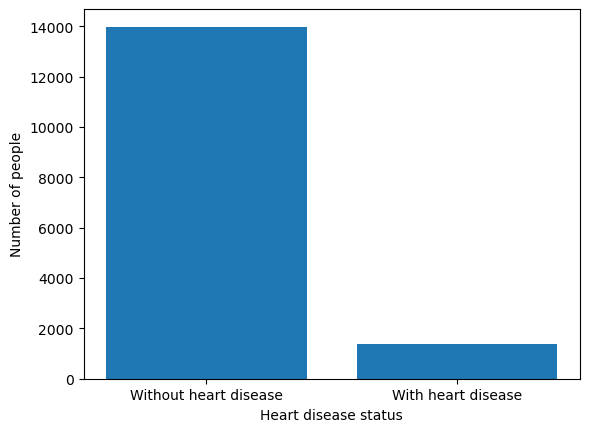

In [5]:
# convert 'Yes' and 'No' to 1 and 0, respectively
df['HeartDisease'] = df['HeartDisease'].map({'Yes': 1, 'No': 0})

# count the number of people with and without heart disease
target_counts = df['HeartDisease'].value_counts()

# print the results
print('Number of people with heart disease:', target_counts[1])
print('Number of people without heart disease:', target_counts[0])


# create a bar chart to compare the number of people with and without heart disease
plt.bar(['Without heart disease', 'With heart disease'], target_counts)
plt.xlabel('Heart disease status')
plt.ylabel('Number of people')
plt.show()




Which age category has the highest number of people with heart disease

In [6]:
heart_disease_df = df[df['HeartDisease'] == 1].groupby('AgeCategory')['HeartDisease'].count().sort_values(ascending=False)
highest_group = heart_disease_df.index[0]
print(highest_group)





70-74


### Import some functions from the Python script

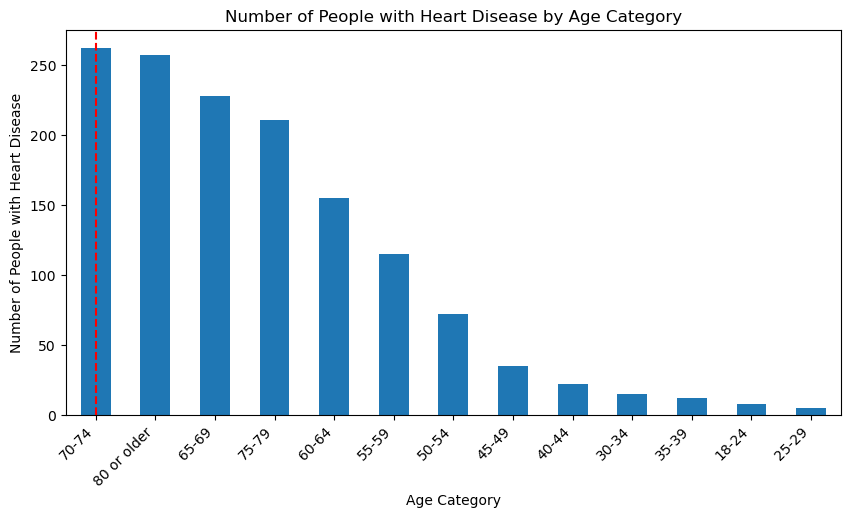

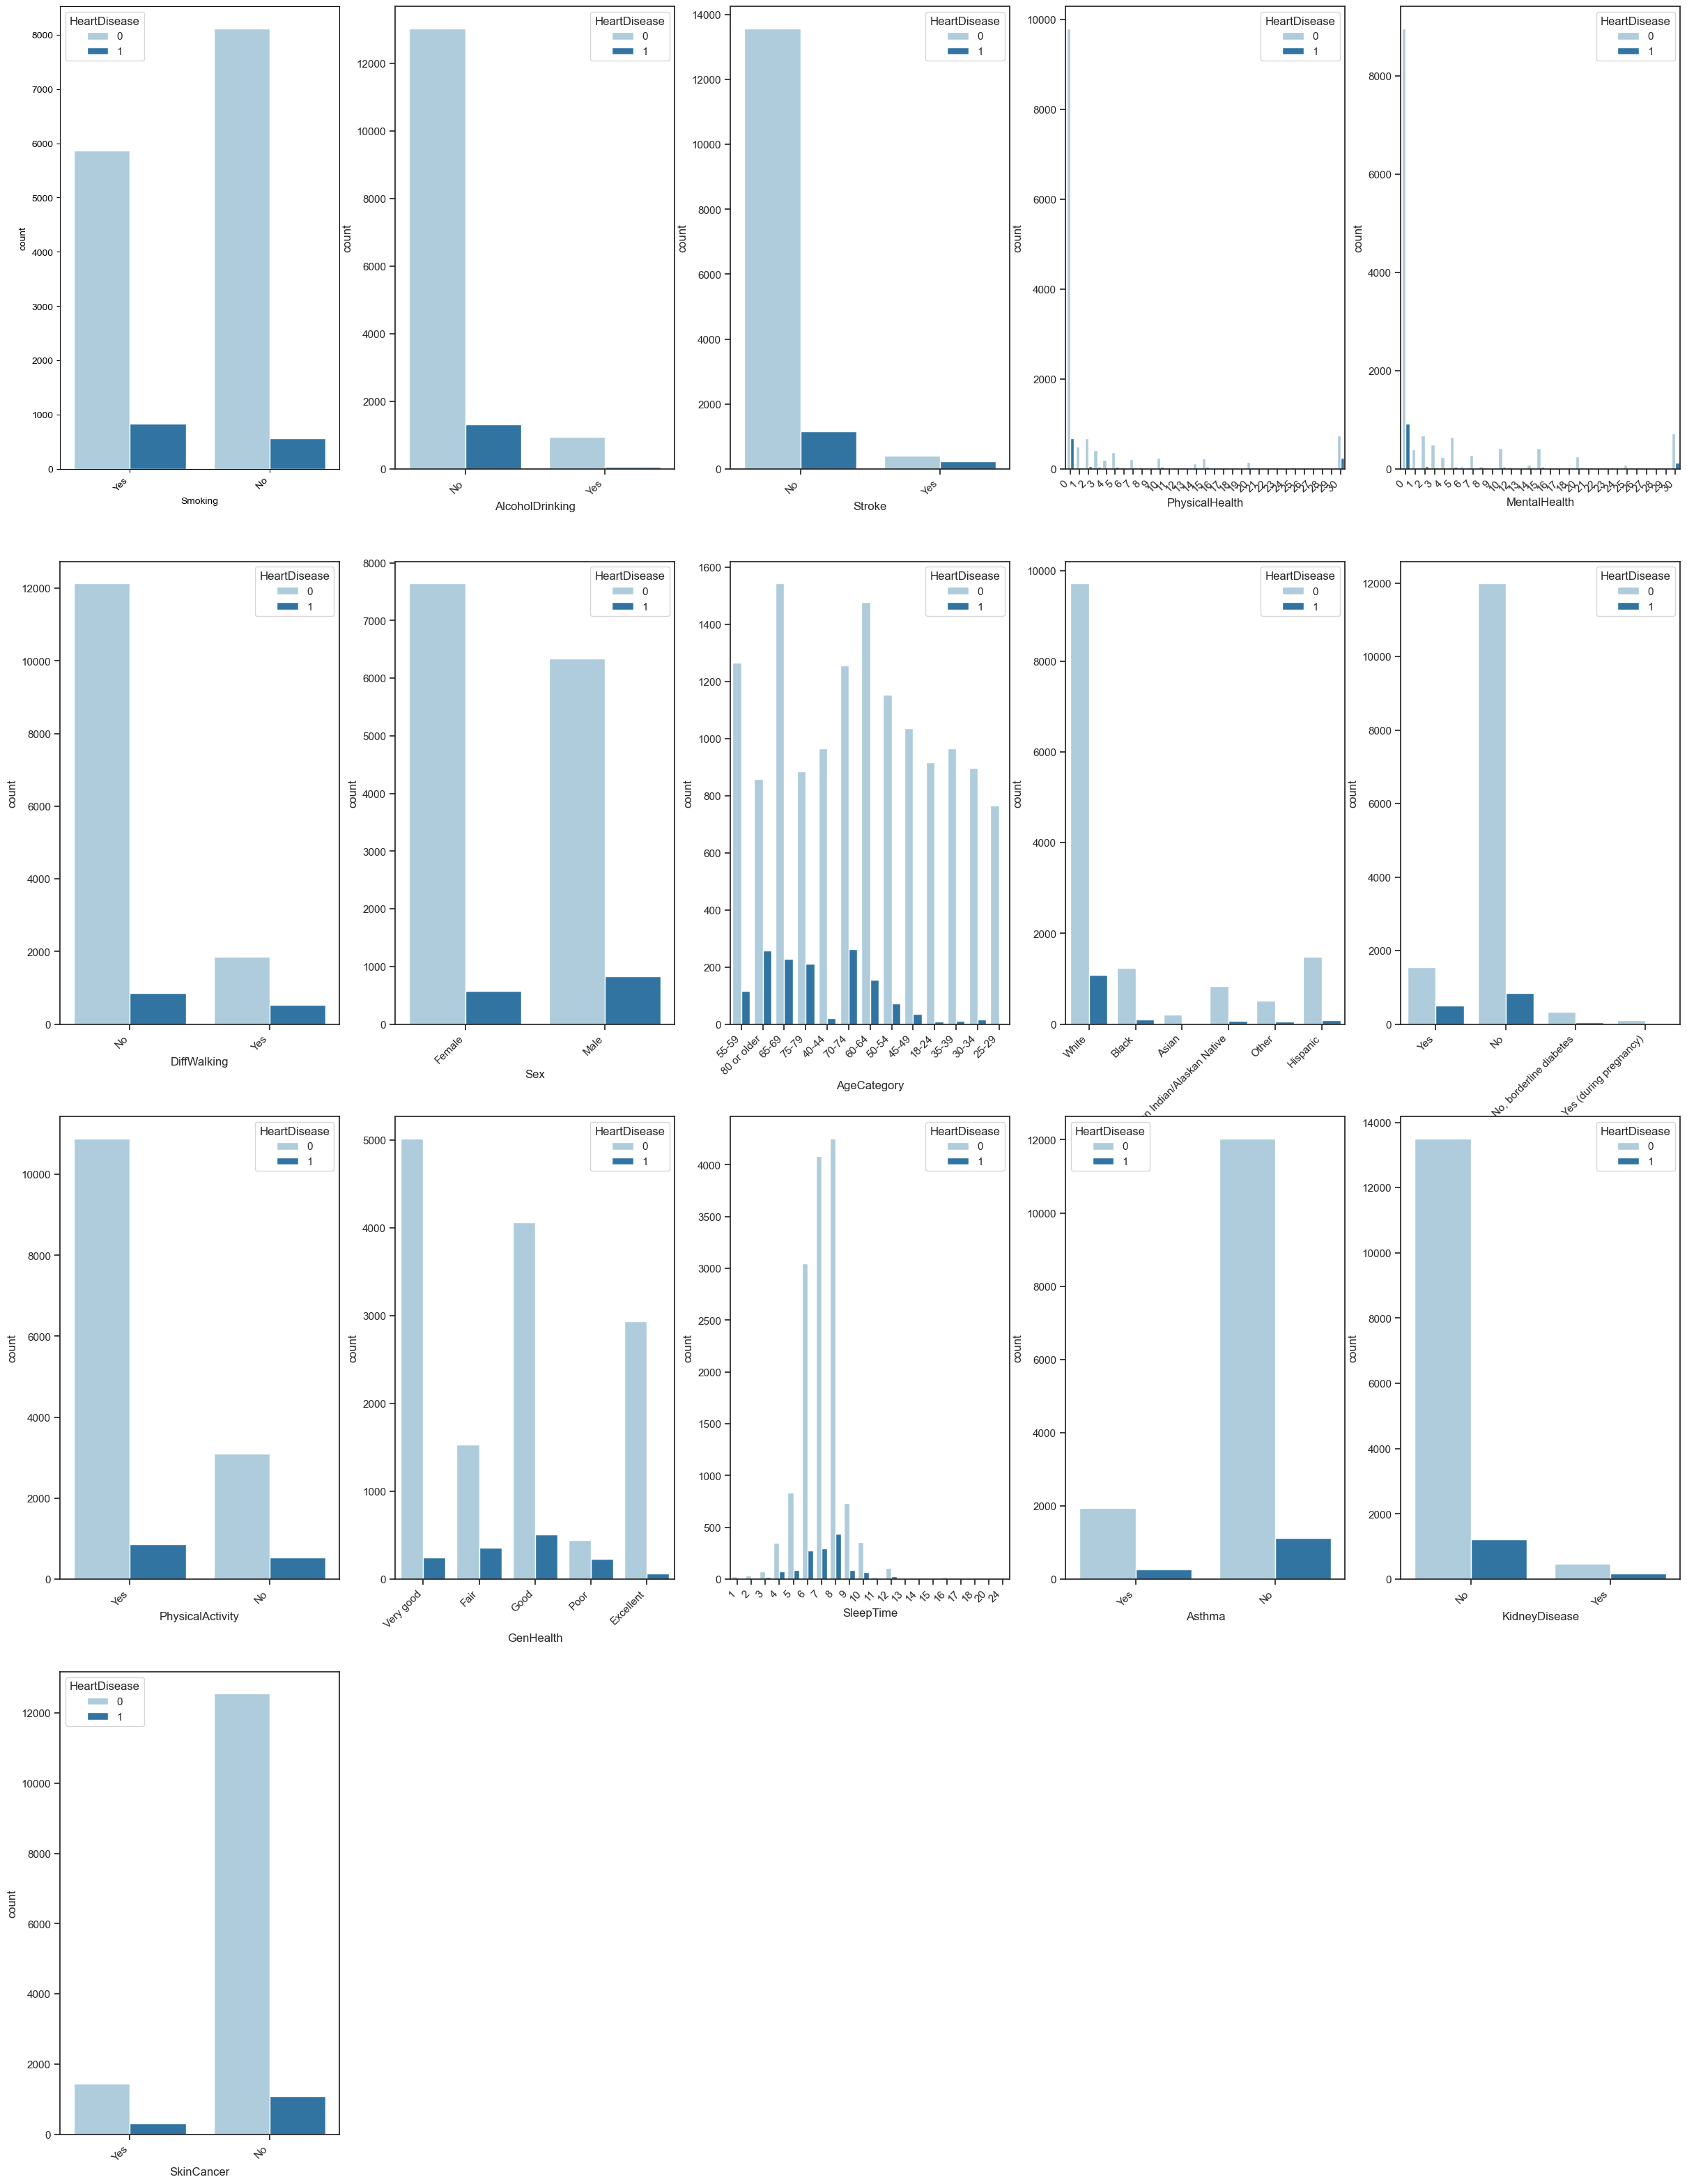

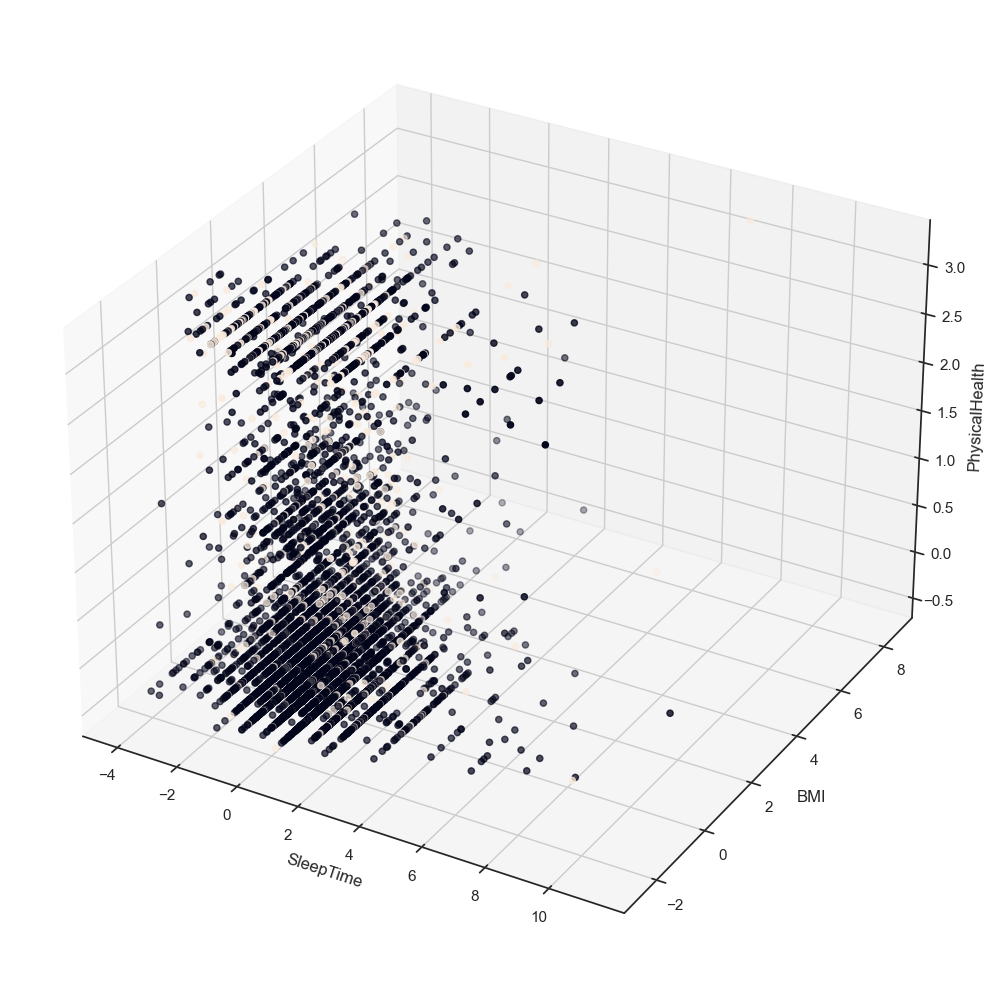

In [7]:
import group_4_capstone_project_lib

Some category features relationship with Heart Disease

3D dimension to clearly see the distributed of Heart Disease. We choose SleepTime, BMI and Physical Health because 
these less correlated each other

### Distribution

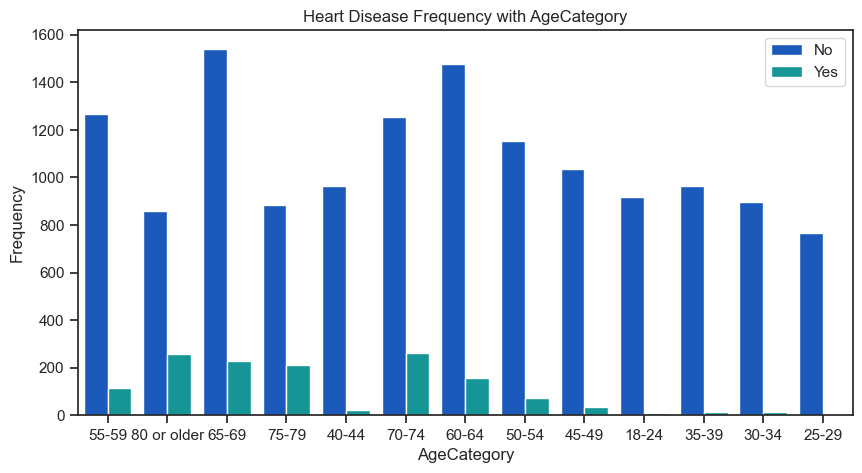

In [8]:
# Heart Disease Frequency with AgeCategory
plt.figure(figsize=(10,5))
sns.countplot(x='AgeCategory', data=df, hue='HeartDisease',palette="winter")
plt.title('Heart Disease Frequency with AgeCategory')
plt.xlabel('AgeCategory')
plt.legend(["No", "Yes"])
plt.ylabel('Frequency')
plt.show()

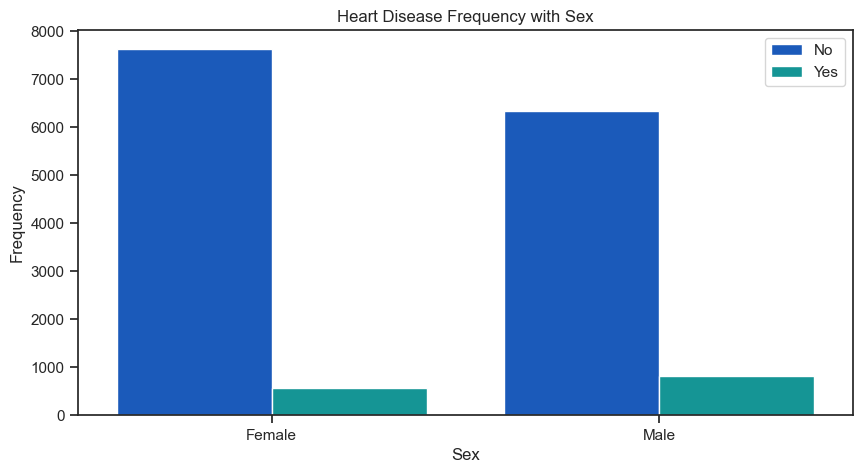

In [9]:
# Heart Disease Frequency with Sex
plt.figure(figsize=(10,5))
sns.countplot(x = df['Sex'], data=df, hue='HeartDisease',palette="winter")
plt.title('Heart Disease Frequency with Sex')
plt.xlabel('Sex')
plt.legend(["No", "Yes"])
plt.ylabel('Frequency')
plt.show()

### Scatter Plot

Categorical Data Handling: The code identifies categorical features in df and creates a new DataFrame df_cat containing only 
these features. It then uses sklearn.preprocessing.OrdinalEncoder to encode the categorical features into numeric values.


In [10]:
# 1. Handle categorical data
# Define 2 array contain features are categorical type(include Heart Disease feature) 
# and numeric type
cat_features = []
num_features = []
for column, i in zip(df.columns, df.dtypes):
    if i == object:
        cat_features.append(column)
    else:
        num_features.append(column)

In [11]:
df_cat = df[cat_features].copy()

In [12]:
df_cat.head(3)

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No


In [13]:
# Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_cat_encoded = ordinal_encoder.fit_transform(df_cat)
df_cat_encoded = pd.DataFrame(df_cat_encoded, columns = cat_features)

In [14]:
df_cat_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15377 entries, 0 to 15376
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Smoking           15377 non-null  float64
 1   AlcoholDrinking   15377 non-null  float64
 2   Stroke            15377 non-null  float64
 3   DiffWalking       15377 non-null  float64
 4   Sex               15377 non-null  float64
 5   AgeCategory       15377 non-null  float64
 6   Race              15377 non-null  float64
 7   Diabetic          15377 non-null  float64
 8   PhysicalActivity  15377 non-null  float64
 9   GenHealth         15377 non-null  float64
 10  Asthma            15377 non-null  float64
 11  KidneyDisease     15377 non-null  float64
 12  SkinCancer        15377 non-null  float64
dtypes: float64(13)
memory usage: 1.5 MB


Numeric Data Handling: The code creates a DataFrame df_num containing only the numeric features from df. It performs standardization using sklearn.preprocessing.StandardScaler to scale the numeric features.


In [15]:
# OrdinalEncoderconvert categorical to numeric
for feature in df_cat_encoded.columns:
    print(feature)
    print(df_cat_encoded[feature].unique(),"\n")

Smoking
[1. 0.] 

AlcoholDrinking
[0. 1.] 

Stroke
[0. 1.] 

DiffWalking
[0. 1.] 

Sex
[0. 1.] 

AgeCategory
[ 7. 12.  9. 11.  4. 10.  8.  6.  5.  0.  3.  2.  1.] 

Race
[5. 2. 1. 0. 4. 3.] 

Diabetic
[2. 0. 1. 3.] 

PhysicalActivity
[1. 0.] 

GenHealth
[4. 1. 2. 3. 0.] 

Asthma
[1. 0.] 

KidneyDisease
[0. 1.] 

SkinCancer
[1. 0.] 



Merging DataFrames: The code merges the encoded categorical data (df_cat_encoded) with the scaled numeric data (df_num_scaler) to create a new DataFrame df_new that contains both scaled and encoded features.

merge new dataframe with numeric feature to create new numeric dataframe

In [16]:
df_numeric = pd.merge(df_cat_encoded, df[num_features],left_index=True, right_index=True)

In [17]:
df_numeric.head(10)

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime
0,1.0,0.0,0.0,0.0,0.0,7.0,5.0,2.0,1.0,4.0,1.0,0.0,1.0,0,16.60,3,30,5
1,0.0,0.0,1.0,0.0,0.0,12.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0,0,20.34,0,0,7
2,1.0,0.0,0.0,0.0,1.0,9.0,5.0,2.0,1.0,1.0,1.0,0.0,0.0,0,26.58,20,30,8
3,0.0,0.0,0.0,0.0,0.0,11.0,5.0,0.0,0.0,2.0,0.0,0.0,1.0,0,24.21,0,0,6
4,0.0,0.0,0.0,1.0,0.0,4.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0,0,23.71,28,0,8
5,1.0,0.0,0.0,1.0,0.0,11.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1,28.87,6,0,12
6,0.0,0.0,0.0,0.0,0.0,10.0,5.0,0.0,1.0,1.0,1.0,0.0,1.0,0,21.63,15,0,4
7,1.0,0.0,0.0,1.0,0.0,12.0,5.0,2.0,0.0,2.0,1.0,0.0,0.0,0,31.64,5,0,9
8,0.0,0.0,0.0,0.0,0.0,12.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,0,26.45,0,0,5
9,0.0,0.0,0.0,1.0,1.0,9.0,5.0,0.0,1.0,2.0,0.0,0.0,0.0,0,40.69,0,0,10


Handle numeric data
Standardization

In [18]:
from sklearn.preprocessing import StandardScaler
stand_scale = StandardScaler()
df_num = df[num_features].copy()
df_num_scaler = stand_scale.fit_transform(df_num)
df_num_scaler = pd.DataFrame(df_num_scaler, columns = num_features)
df_num_scaler

,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime
0,-0.316115,-1.847968,-0.086719,3.245028,-1.404232
1,-0.316115,-1.263115,-0.450759,-0.492653,-0.075399
2,-0.316115,-0.287318,1.976172,3.245028,0.589018
3,-0.316115,-0.657933,-0.450759,-0.492653,-0.739815
4,-0.316115,-0.736122,2.946944,-0.492653,0.589018
...,...,...,...,...,...
15372,-0.316115,0.957449,-0.450759,-0.492653,-0.739815
15373,-0.316115,-1.095791,-0.450759,-0.492653,-0.075399
15374,-0.316115,-0.453079,-0.450759,-0.492653,0.589018
15375,-0.316115,0.267823,-0.450759,-0.492653,-4.061899


In [19]:
df_numeric_scaler = pd.merge(df_cat_encoded, df_num_scaler,left_index=True, right_index=True)

In [20]:
df_numeric_scaler.head(10)

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime
0,1.0,0.0,0.0,0.0,0.0,7.0,5.0,2.0,1.0,4.0,1.0,0.0,1.0,-0.316115,-1.847968,-0.086719,3.245028,-1.404232
1,0.0,0.0,1.0,0.0,0.0,12.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0,-0.316115,-1.263115,-0.450759,-0.492653,-0.075399
2,1.0,0.0,0.0,0.0,1.0,9.0,5.0,2.0,1.0,1.0,1.0,0.0,0.0,-0.316115,-0.287318,1.976172,3.245028,0.589018
3,0.0,0.0,0.0,0.0,0.0,11.0,5.0,0.0,0.0,2.0,0.0,0.0,1.0,-0.316115,-0.657933,-0.450759,-0.492653,-0.739815
4,0.0,0.0,0.0,1.0,0.0,4.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0,-0.316115,-0.736122,2.946944,-0.492653,0.589018
5,1.0,0.0,0.0,1.0,0.0,11.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,3.163409,0.070787,0.277321,-0.492653,3.246685
6,0.0,0.0,0.0,0.0,0.0,10.0,5.0,0.0,1.0,1.0,1.0,0.0,1.0,-0.316115,-1.061388,1.369439,-0.492653,-2.068649
7,1.0,0.0,0.0,1.0,0.0,12.0,5.0,2.0,0.0,2.0,1.0,0.0,0.0,-0.316115,0.503953,0.155974,-0.492653,1.253435
8,0.0,0.0,0.0,0.0,0.0,12.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,-0.316115,-0.307647,-0.450759,-0.492653,-1.404232
9,0.0,0.0,0.0,1.0,1.0,9.0,5.0,0.0,1.0,2.0,0.0,0.0,0.0,-0.316115,1.919172,-0.450759,-0.492653,1.917851


In [21]:
# create new dataframe that already scale and convert categorical to numeric
df_new = df_numeric_scaler.copy()

In [22]:
df_new.head(3)

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime
0,1.0,0.0,0.0,0.0,0.0,7.0,5.0,2.0,1.0,4.0,1.0,0.0,1.0,-0.316115,-1.847968,-0.086719,3.245028,-1.404232
1,0.0,0.0,1.0,0.0,0.0,12.0,5.0,0.0,1.0,4.0,0.0,0.0,0.0,-0.316115,-1.263115,-0.450759,-0.492653,-0.075399
2,1.0,0.0,0.0,0.0,1.0,9.0,5.0,2.0,1.0,1.0,1.0,0.0,0.0,-0.316115,-0.287318,1.976172,3.245028,0.589018


In [23]:
df_new.describe()

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime
count,15377.000000,15377.000000,15377.000000,15377.000000,15377.000000,15377.000000,15377.000000,15377.000000,15377.000000,15377.000000,15377.000000,15377.000000,15377.000000,1.537700e+04,1.537700e+04,1.537700e+04,1.537700e+04,1.537700e+04
mean,0.435846,0.065683,0.042466,0.155167,0.466216,6.596930,4.151135,0.313195,0.763153,2.215972,0.144502,0.042401,0.113351,-2.310408e-17,6.173409e-16,7.762969e-17,-5.544978e-18,2.365857e-16
std,0.495883,0.247734,0.201656,0.362075,0.498874,3.525179,1.479982,0.724984,0.425162,1.505534,0.351609,0.201509,0.317032,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.161146e-01,-2.504755e+00,-4.507585e-01,-4.926535e-01,-4.061899e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-3.161146e-01,-6.860814e-01,-4.507585e-01,-4.926535e-01,-7.398155e-01
50%,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,5.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,-3.161146e-01,-1.575245e-01,-4.507585e-01,-4.926535e-01,-7.539878e-02
75%,1.000000,0.000000,0.000000,0.000000,1.000000,9.000000,5.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,-3.161146e-01,5.023897e-01,-2.080655e-01,-1.188853e-01,5.890179e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,5.000000,3.000000,1.000000,4.000000,1.000000,1.000000,1.000000,3.163409e+00,8.535516e+00,3.189637e+00,3.245028e+00,1.121968e+01


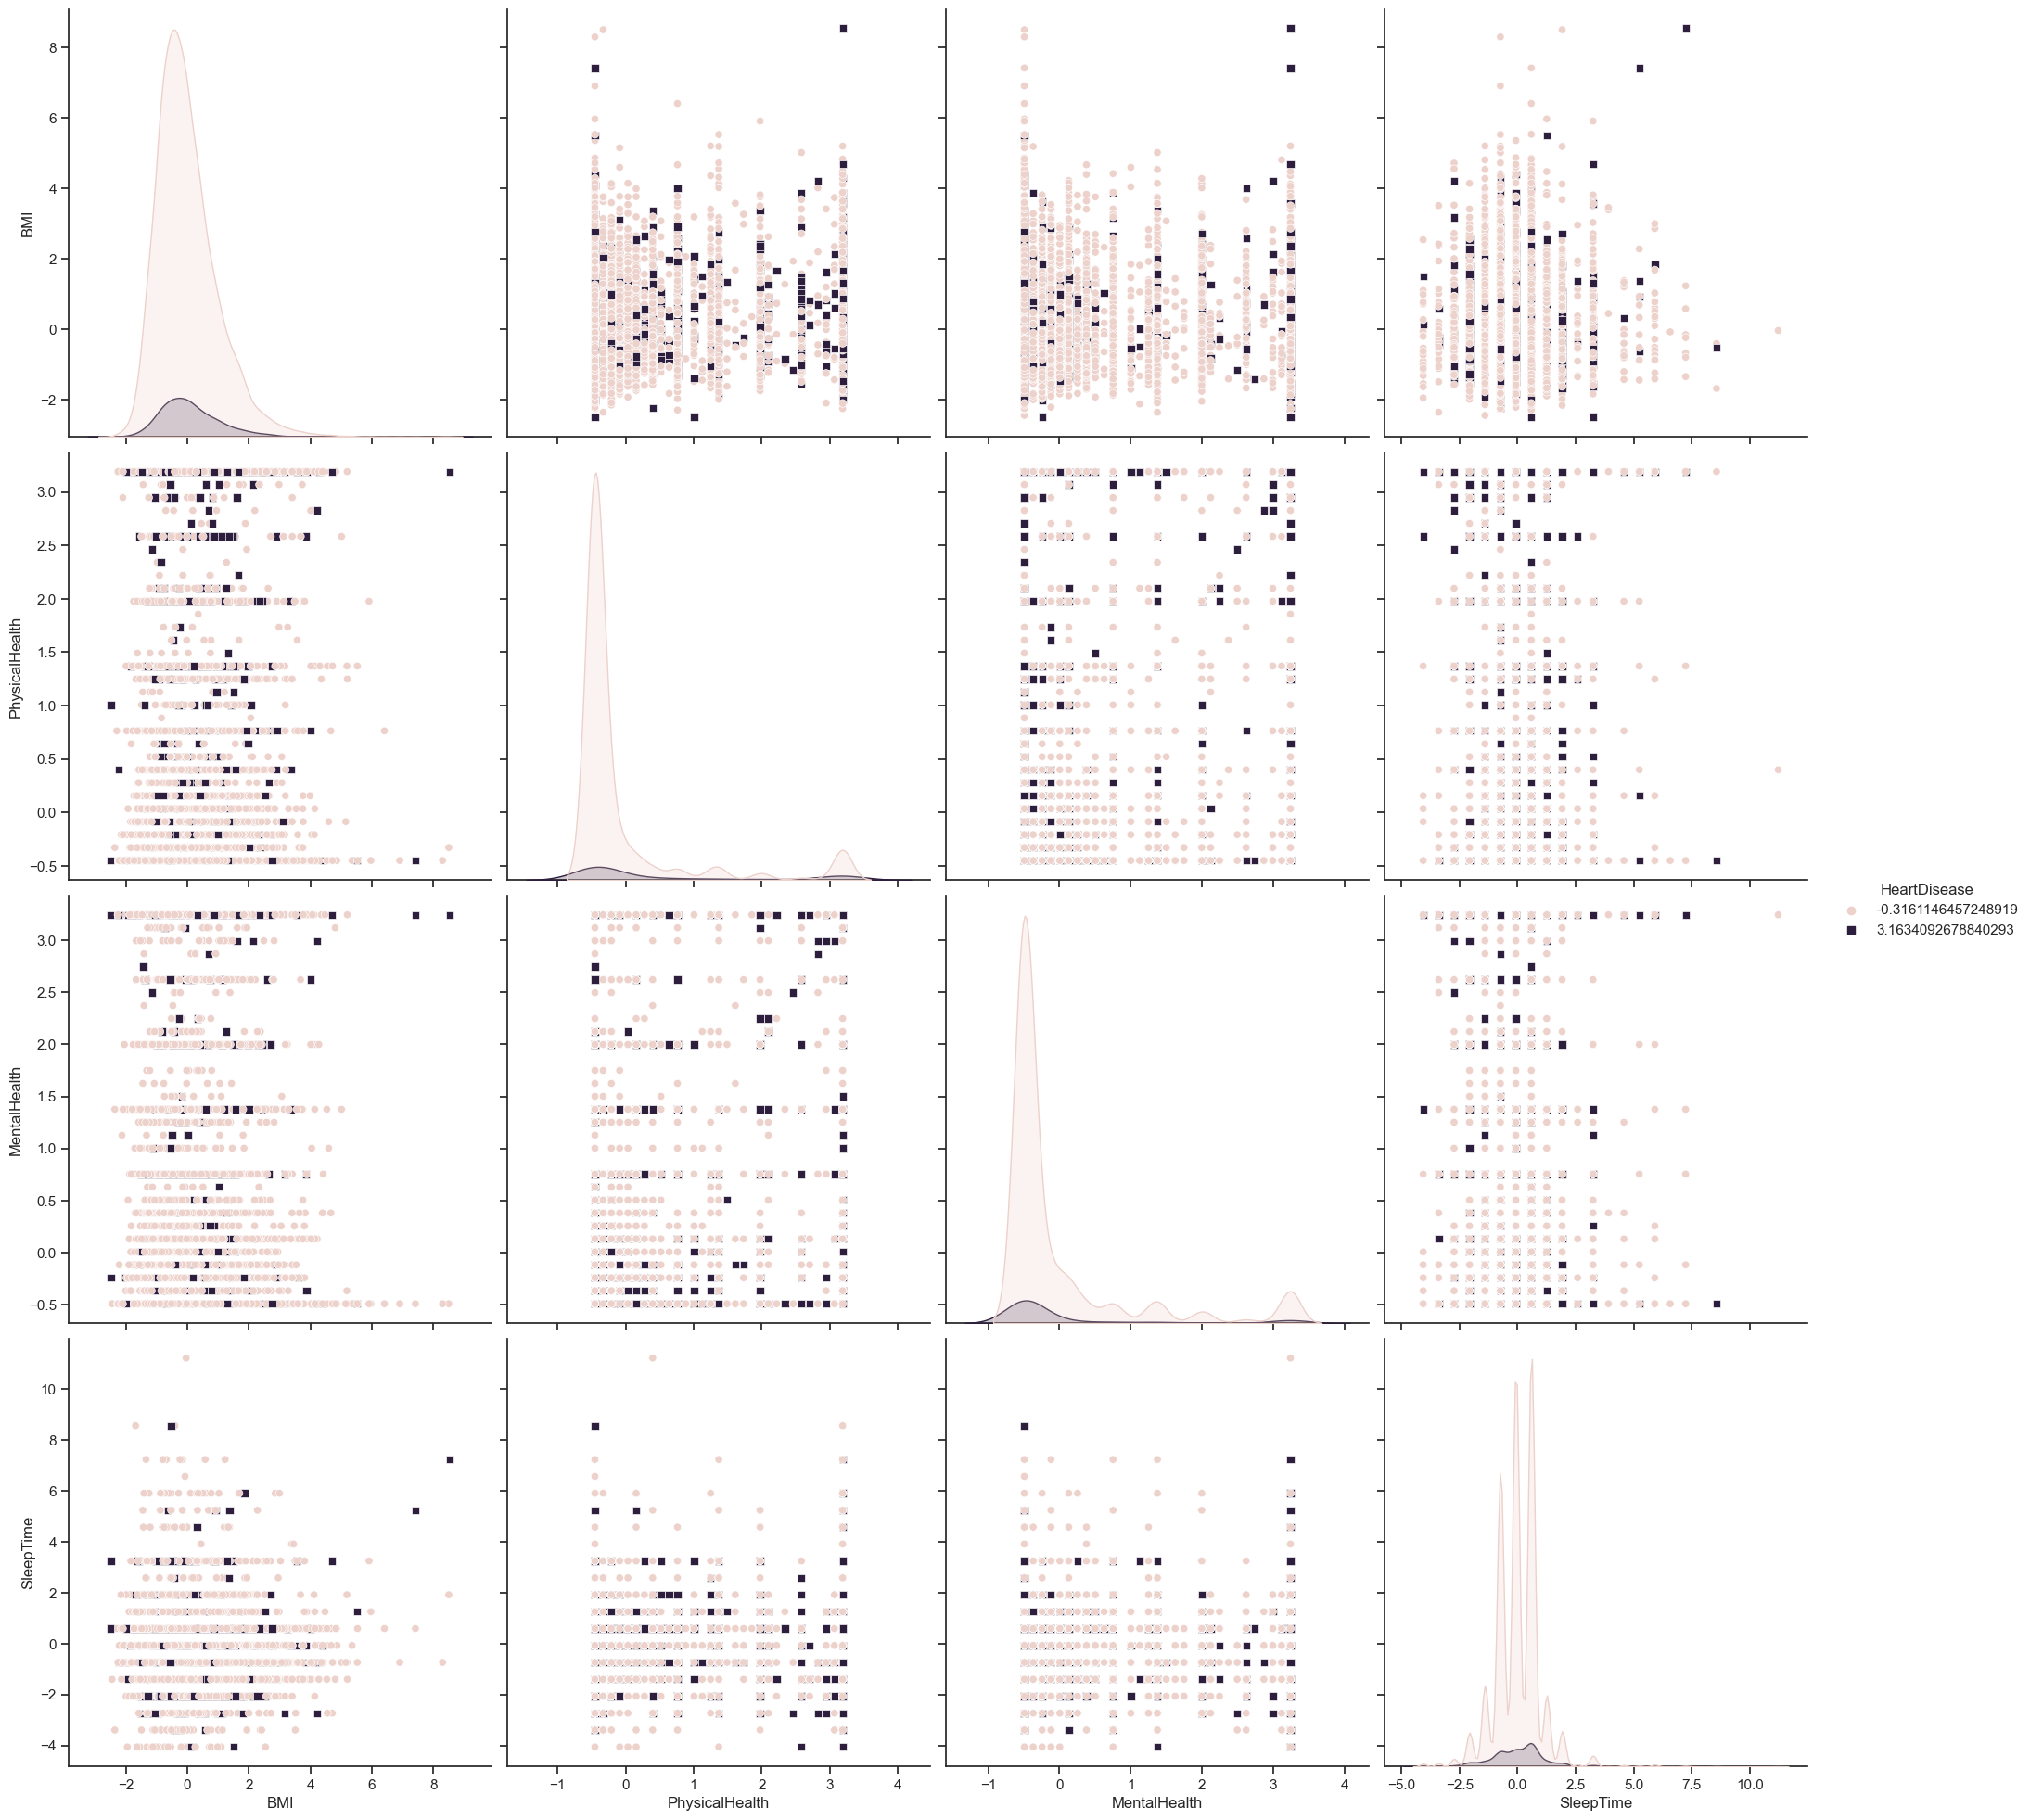

In [24]:
sns.pairplot(df_new[["HeartDisease","BMI","PhysicalHealth", "MentalHealth", "SleepTime"]], hue="HeartDisease", markers=["o", "s"], height=5)
plt.show()

Conclusion: When we draw the scatter plot both in 2D and 3D, we want to add hue is Heart Disease to check whether this data suitable for classification. As a result, we can not clearly see the divided area for Heart Disease and No Heart Disease in these scatterplot. No matter how the good algorithm are, if Heart Disease points are mixing with No Heart Disease, the algorithm cannot predict a line or zoning area between Heart Disease and No Heart Disease.

### Correlation

In [25]:
corr_matrix = df_numeric.corr()
corr_matrix

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime
Smoking,1.000000,0.110538,0.051635,0.111229,0.103430,0.123942,0.057167,0.032738,-0.097371,0.027141,0.027808,0.019414,0.041088,0.103644,-0.020521,0.101112,0.066140,-0.018085
AlcoholDrinking,0.110538,1.000000,-0.016782,-0.044749,0.015851,-0.049069,0.027380,-0.057332,0.010630,0.026831,-0.003693,-0.028434,0.003739,-0.022615,-0.031490,-0.011589,0.029477,-0.014759
Stroke,0.051635,-0.016782,1.000000,0.176076,-0.006749,0.135055,-0.020199,0.111873,-0.071562,-0.004719,0.048284,0.082124,0.043725,0.203866,0.019410,0.134244,0.051226,0.006620
DiffWalking,0.111229,-0.044749,0.176076,1.000000,-0.062070,0.242883,-0.008691,0.221674,-0.292727,-0.046089,0.110457,0.131774,0.062631,0.198887,0.180209,0.436173,0.155847,-0.026346
Sex,0.103430,0.015851,-0.006749,-0.062070,1.000000,-0.056116,0.024445,-0.000772,0.060699,-0.010677,-0.070421,-0.019391,0.019897,0.080149,0.014430,-0.040263,-0.107663,-0.005158
AgeCategory,0.123942,-0.049069,0.135055,0.242883,-0.056116,1.000000,0.188591,0.190658,-0.120242,0.044735,-0.032079,0.128067,0.294199,0.235719,-0.031570,0.110841,-0.139971,0.105370
Race,0.057167,0.027380,-0.020199,-0.008691,0.024445,0.188591,1.000000,-0.065455,0.049347,0.055168,-0.008351,0.012749,0.171957,0.046155,-0.098765,-0.003188,-0.016849,0.010402
Diabetic,0.032738,-0.057332,0.111873,0.221674,-0.000772,0.190658,-0.065455,1.000000,-0.126037,-0.010971,0.067886,0.137915,0.026061,0.192417,0.199825,0.165645,0.047102,-0.003667
PhysicalActivity,-0.097371,0.010630,-0.071562,-0.292727,0.060699,-0.120242,0.049347,-0.126037,1.000000,0.026069,-0.056873,-0.068757,-0.016007,-0.112369,-0.144695,-0.247506,-0.107995,-0.001291
GenHealth,0.027141,0.026831,-0.004719,-0.046089,-0.010677,0.044735,0.055168,-0.010971,0.026069,1.000000,0.007262,-0.018396,0.026783,-0.009125,0.017696,-0.031468,-0.010877,-0.008894


The correlation matrix hard to understand, so we draw heat map to easy intepret. The higher correlation, the brighter cell.

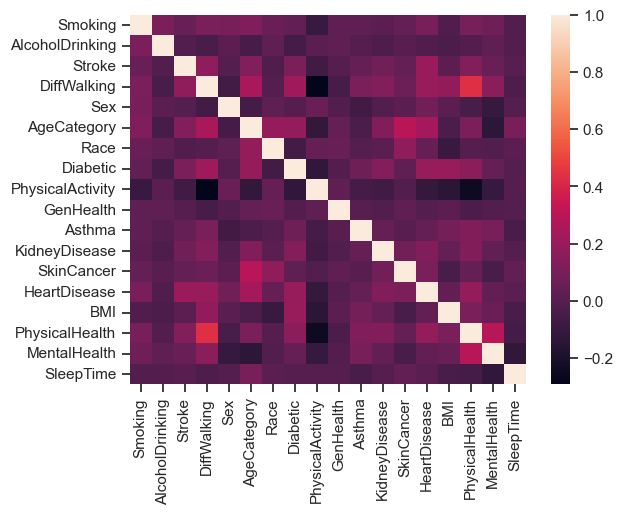

In [26]:
sns.heatmap(corr_matrix)
plt.show()

However, we want to only look at the Heart Disease to see which feature most correlated to Heart Disease, so we take Heart Disease in correlation matrix and sort by descending

In [27]:
corr_matrix["HeartDisease"].drop("HeartDisease").sort_values(ascending=False)

AgeCategory         0.235719
Stroke              0.203866
DiffWalking         0.198887
Diabetic            0.192417
PhysicalHealth      0.185060
KidneyDisease       0.126633
SkinCancer          0.107529
Smoking             0.103644
Sex                 0.080149
Race                0.046155
Asthma              0.044492
BMI                 0.038640
MentalHealth        0.037269
SleepTime           0.010745
GenHealth          -0.009125
AlcoholDrinking    -0.022615
PhysicalActivity   -0.112369
Name: HeartDisease, dtype: float64

### Covariance

In [28]:
cov_matrix = df_numeric.cov()
cov_matrix

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer,HeartDisease,BMI,PhysicalHealth,MentalHealth,SleepTime
Smoking,0.245900,0.013579,0.005163,0.019971,0.025587,0.216661,0.041955,0.011769,-0.020529,0.020263,0.004849,0.001940,0.006459,0.014771,-0.065076,0.413208,0.263257,-0.013498
AlcoholDrinking,0.013579,0.061372,-0.000838,-0.004014,0.001959,-0.042852,0.010039,-0.010297,0.001120,0.010007,-0.000322,-0.001419,0.000294,-0.001610,-0.049889,-0.023659,0.058613,-0.005503
Stroke,0.005163,-0.000838,0.040665,0.012856,-0.000679,0.096007,-0.006028,0.016356,-0.006135,-0.001433,0.003424,0.003337,0.002795,0.011815,0.025031,0.223097,0.082915,0.002009
DiffWalking,0.019971,-0.004014,0.012856,0.131099,-0.011212,0.310011,-0.004657,0.058189,-0.045063,-0.025124,0.014062,0.009614,0.007189,0.020697,0.417268,1.301501,0.452929,-0.014358
Sex,0.025587,0.001959,-0.000679,-0.011212,0.248875,-0.098686,0.018049,-0.000279,0.012874,-0.008019,-0.012352,-0.001949,0.003147,0.011492,0.046035,-0.165534,-0.431112,-0.003873
AgeCategory,0.216661,-0.042852,0.096007,0.310011,-0.098686,12.426884,0.983919,0.487265,-0.180215,0.237422,-0.039762,0.090973,0.328795,0.238819,-0.711694,3.220105,-3.960507,0.559076
Race,0.041955,0.010039,-0.006028,-0.004657,0.018049,0.983919,2.190346,-0.070231,0.031051,0.122924,-0.004346,0.003802,0.080682,0.019632,-0.934759,-0.038880,-0.200156,0.023171
Diabetic,0.011769,-0.010297,0.016356,0.058189,-0.000279,0.487265,-0.070231,0.525602,-0.038849,-0.011975,0.017305,0.020148,0.005990,0.040093,0.926441,0.989679,0.274095,-0.004001
PhysicalActivity,-0.020529,0.001120,-0.006135,-0.045063,0.012874,-0.180215,0.031051,-0.038849,0.180762,0.016686,-0.008502,-0.005891,-0.002158,-0.013731,-0.393412,-0.867214,-0.368545,-0.000826
GenHealth,0.020263,0.010007,-0.001433,-0.025124,-0.008019,0.237422,0.122924,-0.011975,0.016686,2.266634,0.003844,-0.005581,0.012784,-0.003949,0.170373,-0.390434,-0.131436,-0.020153


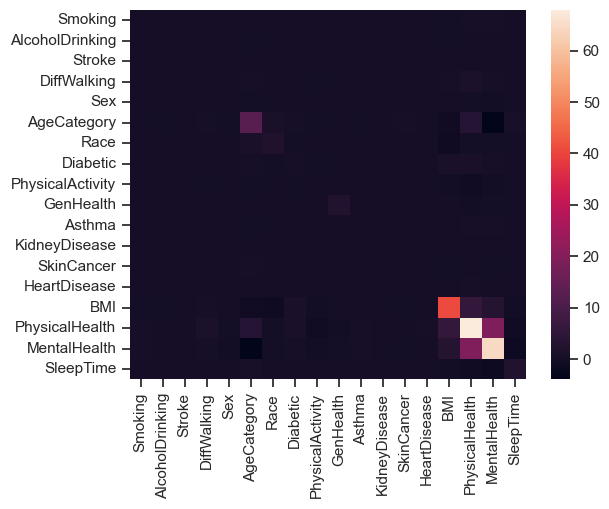

In [29]:
sns.heatmap(cov_matrix)
plt.show()

In [30]:
cov_matrix["HeartDisease"].drop("HeartDisease").sort_values(ascending=False)

PhysicalHealth      0.438323
AgeCategory         0.238819
MentalHealth        0.085975
BMI                 0.071018
Diabetic            0.040093
DiffWalking         0.020697
Race                0.019632
Smoking             0.014771
Stroke              0.011815
Sex                 0.011492
SkinCancer          0.009798
KidneyDisease       0.007334
SleepTime           0.004648
Asthma              0.004496
AlcoholDrinking    -0.001610
GenHealth          -0.003949
PhysicalActivity   -0.013731
Name: HeartDisease, dtype: float64

define plot_bar_chart

In [31]:
def plot_bar_chart(df1, df2, maintitle="Main title", title1='Before Normialization',title2='After Normialization'):
    fig,axes = plt.subplots(1,2,figsize=(15,8))

    axes[0].barh(df1.index, df1.values)
    axes[0].set_title(title1)
    axes[0].invert_yaxis()
    
    axes[1].barh(df2.index,df2.values)
    axes[1].set_title(title2)
    axes[1].invert_yaxis()
    
    fig.suptitle(maintitle, fontsize=15)
    
    fig.tight_layout()
    plt.show()

draw the 2 graph of correlation and covariance

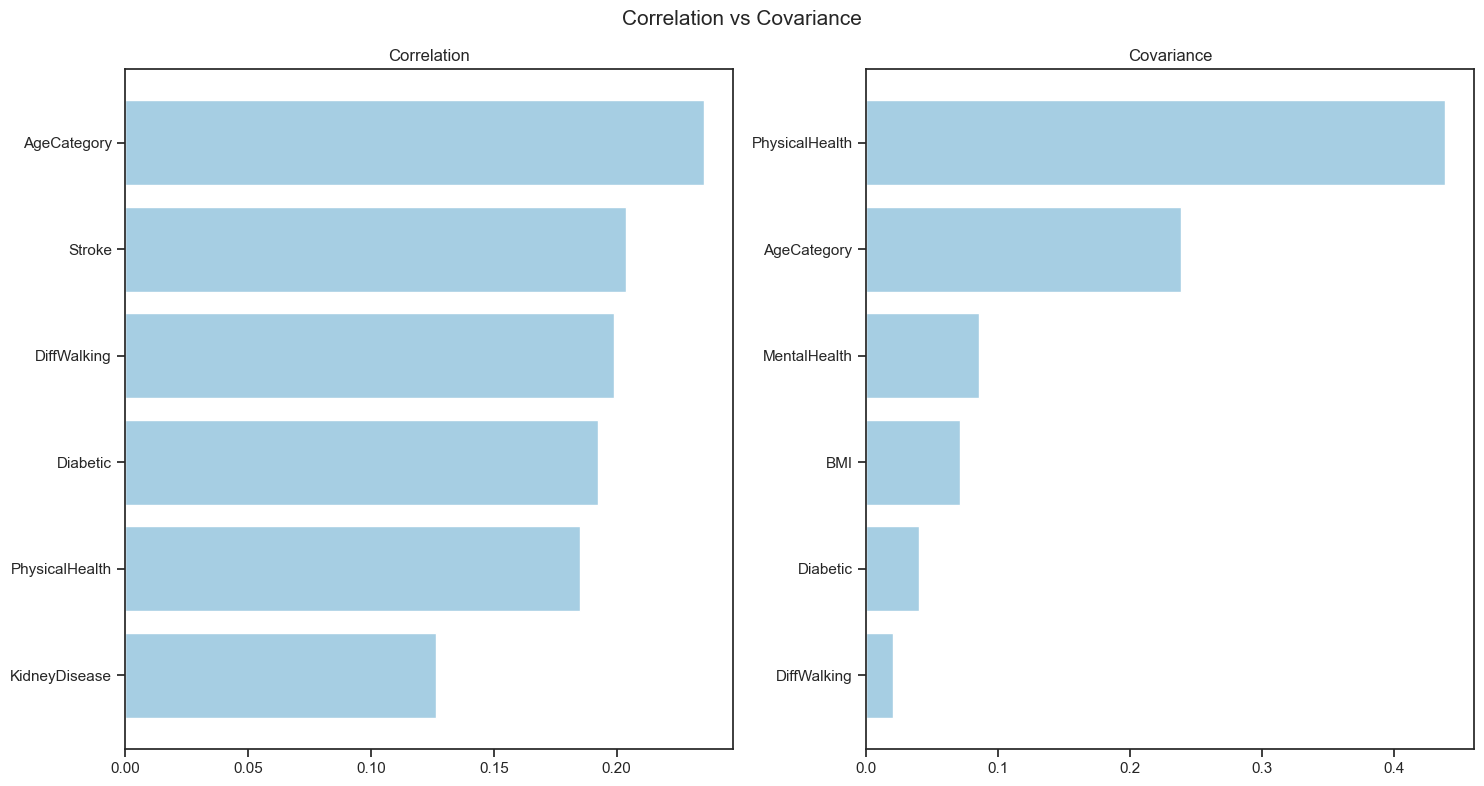

In [32]:
unscaling_cor = corr_matrix["HeartDisease"].drop("HeartDisease").sort_values(ascending=False)[:6]
unscaling_cov = cov_matrix["HeartDisease"].drop("HeartDisease").sort_values(ascending=False)[:6]

plot_bar_chart(unscaling_cor,unscaling_cov,maintitle = "Correlation vs Covariance", title1="Correlation",title2="Covariance")

especially AgeCategory in top 2 both cases. So we can conclude the AgeCategory has the most affect to Heart Disease.

## Predictive Models (Statistical/Predictive Analysis)

### Linear Regression Model

In [33]:
from statsmodels.stats import weightstats as weightstats
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [34]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd



# Drop missing values
df = df[['AgeCategory', 'PhysicalHealth', 'MentalHealth', 'HeartDisease']].dropna()

# Define the regression model
myModel = smf.ols(formula='HeartDisease ~ AgeCategory + PhysicalHealth + MentalHealth', data=df)

# Fit the model
res = myModel.fit()

# Print the summary statistics
print(res.summary())

print(df.columns)


                            OLS Regression Results                            
Dep. Variable:           HeartDisease   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     106.8
Date:                Sun, 21 May 2023   Prob (F-statistic):          2.55e-296
Time:                        11:07:01   Log-Likelihood:                -1931.6
No. Observations:               15377   AIC:                             3893.
Df Residuals:                   15362   BIC:                             4008.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

P>|t| for independent variables: The p-values associated with each independent variable indicate their individual significance in predicting HeartDisease. A p-value less than the chosen significance level (often 0.05) suggests that the variable has a statistically significant relationship with HeartDisease. In this case, the p-values for some AgeCategory groups (e.g., AgeCategory[T.50-54], AgeCategory[T.55-59]) and PhysicalHealth are less than 0.05, indicating significant associations. However, AgeCategory[T.25-29], AgeCategory[T.30-34], AgeCategory[T.35-39], and MentalHealth have p-values greater than 0.05, indicating no significant association with HeartDisease.

### Logistic Regression Model
This code is for building and evaluating a logistic regression model for heart disease prediction. We import the necessary libraries for data manipulation, scaling, model building, and evaluation, normalizing data.  So we split Tinto train and test sets. This section scales the data using MinMaxScaler, which scales the data to a range between 0 and 1. It then creates a new data frame called scaled_df to store the scaled data. 

In [35]:
# This code is for building and evaluating a logistic regression model for heart disease prediction. 
# Here is a breakdown of what each section of the code is doing:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# import the necessary libraries for data manipulation, scaling, model building, and evaluation.
# normalize data
scaler = MinMaxScaler()
names = df_new.columns
d = scaler.fit_transform(df_new)
scaled_df = pd.DataFrame(d, columns=names)

# split into train and test sets
# This section scales the data using MinMaxScaler, which scales the data to a range between 0 and 1.
# It then creates a new DataFrame called scaled_df to store the scaled data.
class_0 = scaled_df[scaled_df['HeartDisease'] == 0]
class_1 = scaled_df[scaled_df['HeartDisease'] == 1]
class_1 = class_1.sample(len(class_0), replace=True)
train_df = pd.concat([class_0, class_1], axis=0)
x = train_df[['AgeCategory' ]]
y = train_df['HeartDisease']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



This section splits the data into training and testing sets using the train_test_split function. It first separates the data into two classes based on the target variable, HeartDisease. It then randomly samples the minority class (class_1) to balance the classes and concatenate the two classes into a new DataFrame called train_df. Finally, it separates the train_df data into input features (x) and target variable (y) and splits it into 80% training and 20% testing sets.

In [36]:
# create logistic regression model
lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)

# predict using the logistic regression model
lr_y_predict = lr.predict(x_test)

# evaluate the logistic regression model
print(f'model: {str(lr)}')
print(f'Accuracy_score: {accuracy_score(y_test, lr_y_predict)}')
print(f'Precision_score: {precision_score(y_test, lr_y_predict)}')
print(f'Recall_score: {recall_score(y_test, lr_y_predict)}')
print(f'F1-score: {f1_score(y_test, lr_y_predict)}')



model: LogisticRegression(random_state=0)
Accuracy_score: 0.6761444921316166
Precision_score: 0.6423336265024919
Recall_score: 0.7875629043853343
F1-score: 0.7075730663652511


This section creates a logistic regression model using the LogisticRegression function and fits the model on the training data.It then uses the predict function to generate the predicted values for the testing data. Finally, it evaluates the performance of the model using four metrics - accuracy_score, precision_score, recall_score, and f1_score - and prints them out.

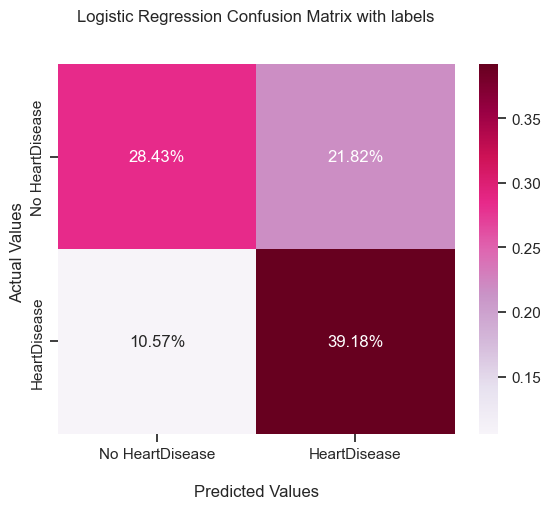

In [37]:
cm  = confusion_matrix(y_test, lr_y_predict)
ax = sns.heatmap(cm/np.sum(cm), annot=True, cmap='PuRd', fmt='.2%')

ax.set_title('Logistic Regression Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['No HeartDisease','HeartDisease'])
ax.yaxis.set_ticklabels(['No HeartDisease','HeartDisease'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Random Forest Model

In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# read the dataset
df = pd.read_csv('C:/Users/张天羽/Desktop/assigned work heart diseases.CSV')

In [39]:
#categorial
le = LabelEncoder()
col = df[['HeartDisease', 'Smoking', 'AlcoholDrinking','AgeCategory', 'Stroke', 'DiffWalking','Race', 'Sex','PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer','GenHealth' ,'Diabetic']]
for i in col:
  df[i] = le.fit_transform(df[i])
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,7,5,2,1,4,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,12,5,0,1,4,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,9,5,2,1,1,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,11,5,0,0,2,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,4,5,0,1,4,8,0,0,0


In [40]:
#numeric
num_cols = ['MentalHealth', 'BMI', 'PhysicalHealth', 'SleepTime'  ]
Scaler = StandardScaler()
df[num_cols] = Scaler.fit_transform(df[num_cols])

In [41]:
#Declare feature vector and target variable
X = df.drop(columns =['HeartDisease'], axis = 1)
Y = df['HeartDisease']

In [42]:
#Split data into separate training and test set
X_train, x_test, y_train, y_test = train_test_split(X,Y,shuffle = True, test_size = .2, random_state = 42 )
y_train.value_counts()

0    11178
1     1123
Name: HeartDisease, dtype: int64

In [43]:
#As you can see , our data is unbalanced data (234055 '0' , 21781 '1' , so lets try to oversample our data
ros = RandomOverSampler(random_state =42)
X_train_resampled , y_train_resampled , = ros.fit_resample(X_train , y_train)
y_train_resampled.value_counts()

0    11178
1    11178
Name: HeartDisease, dtype: int64

In [44]:
rf=RandomForestClassifier( n_estimators = 9 )
rf.fit(X_train_resampled , y_train_resampled)

y_pred_3 = rf.predict(x_test)

print(classification_report(y_test,y_pred_3))


              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2802
           1       0.29      0.20      0.24       274

    accuracy                           0.88      3076
   macro avg       0.61      0.58      0.59      3076
weighted avg       0.87      0.88      0.88      3076



Random forest model
Precision: For class 0, the precision is 0.93, indicating that the model correctly predicted 93% of the samples as class 0 out of all samples predicted as class 0. For class 1, the precision is 0.30, indicating that the model correctly predicted 30% of the samples as class 1 out of all samples predicted as class 1. Higher precision in a class indicates that the model's predictions for that class are more reliable

Recall: For class 0, the recall is 0.95, indicating that the model correctly identified 95% of the actual class 0 samples. For class 1, the recall is 0.21, indicating that the model correctly identified only 21% of the actual class 1 samples. Higher recall in a class suggests that the model is better at capturing samples of that class.

F1 Score: For class 0, the F1 score is 0.94, and for class 1, the F1 score is 0.25. The F1 score combines precision and recall, and a higher F1 score indicates a better balance between the two. F1 scores closer to 1 indicate better overall performance.

## Conclusion

In this analysis, we explored a heart disease dataset with the aim of gaining insights and understanding the factors that contribute to the occurrence of heart disease. Through various data exploration, preprocessing, and modeling techniques, we were able to draw several important conclusions:

1. Feature Importance: By applying EDA, we determined the significant predictors for heart disease. Features such as AgeCategory, Stroke, and Diffwalking achieved were found to have a strong influence on the presence of heart disease.
2. Model Performance: We trained and evaluated multiple classification models, including linear regression, logistic regression, and random forests. After thorough evaluation using metrics like accuracy, precision, recall, and F1 score, we identified the logistic model as the most suitable for heart disease prediction in this dataset.
3. Key Insights: Our analysis revealed important insights into the dataset. For instance, the Age Category of an individual plays a crucial role in heart disease, with older individuals being more susceptible. Additionally, Stroke and Diffwalking were associated with a higher likelihood of heart disease occurrence.

Overall, this analysis provides valuable insights into the heart disease dataset and highlights important factors associated with heart disease occurrence. By understanding these factors, we can potentially contribute to the development of preventive measures and improved healthcare strategies to reduce the burden of heart disease in the population.

